In [41]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [42]:
def synthetic_data(w,b,num_examples):
    """生成 y = Xw + b + 噪声"""
    X = torch.normal(0,1,(num_examples,len(w)))
    y = torch.matmul(X,w)+b
    y += torch.normal(0,0.01,y.shape)
    return X, y.reshape((-1,1))

In [43]:
true_w = torch.tensor([2,-3.4])
true_b = 4.2
features, labels = synthetic_data(true_w,true_b,1000)

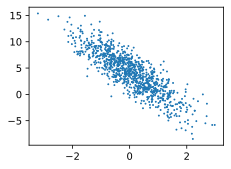

In [44]:
d2l.set_figsize()
d2l.plt.scatter(features[:,1].detach().numpy(),
                labels.detach().numpy(),
                1)

In [45]:
def data_iter(batch_size,features,labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0,num_examples,batch_size):
        batch_indices = torch.tensor(indices[i:min(i+batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [46]:
batch_size = 10
for X,y in data_iter(batch_size, features, labels):
    print(X,'\n')
    break

tensor([[-1.2173, -0.9145],
        [ 2.2491,  2.5636],
        [-0.0972, -1.4051],
        [ 0.9754,  0.1684],
        [-0.1463, -0.3183],
        [ 1.1807, -0.6148],
        [ 1.0633, -0.3131],
        [-0.0387, -0.5428],
        [ 0.2218, -1.1885],
        [ 1.9855,  0.3525]]) 



In [47]:
w = torch.normal(0,0.01,size=(2,1),requires_grad=True)
b = torch.zeros(1,requires_grad=True)

In [48]:
def linreg(X,w,b):
    """线性回归模型"""
    return torch.matmul(X,w)+b

In [49]:
def squared_loss(y_hat,y):
    """均方误差"""
    return (y_hat-y.reshape(y_hat.shape))**2/2

In [50]:
def sgd(params,lr,batch_size):
    """小批量随机梯度下降"""
    with torch.no_grad():
        for param in params:
            param -= lr*param.grad / batch_size
            param.grad.zero_()

In [51]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

In [52]:
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X,w,b),y)
        l.sum().backward()
        sgd([w,b],lr,batch_size)
    
    with torch.no_grad():
        train_l = loss(net(features,w,b),labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.048314
epoch 2, loss 0.000225
epoch 3, loss 0.000052


In [53]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: tensor([-0.0007, -0.0013], grad_fn=<SubBackward0>)
b的估计误差: tensor([0.0003], grad_fn=<RsubBackward1>)
